# Exercises: Linear Regression

Before getting started with coding, read through this [article](https://towardsdatascience.com/simple-linear-regression-model-using-python-machine-learning-eab7924d18b4) and follow the instructions within the article to download the dataset.

Use this notebook to code along with the article.

## Getting Started

Import the libraries you need to start working with the dataset and make a dataframe out of the CSV in the dataset.

In [3]:
#import warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Read the given CSV file, and view some sample records
advertising = pd.read_csv("Company_data.csv")
advertising


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#Run `shape()`, `info()`, and `describe()` to see what is going on with the #dataset.

In [7]:
advertising.shape

(200, 4)

In [6]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:

advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Visualizing Data

Import the necessary libraries to make the same pairplots as the author. Pairplots are used by analysts to see any relationships that may exist between the x- and y-variables.

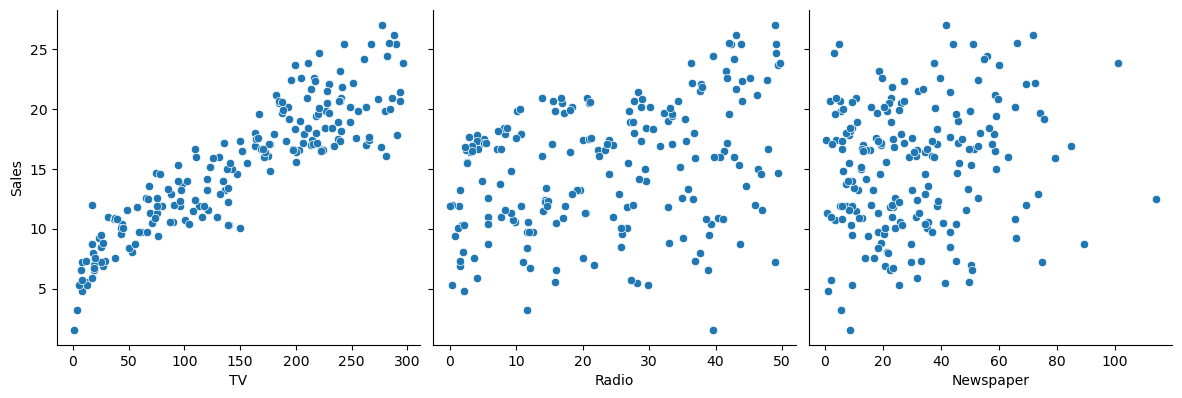

In [31]:
import matplotlib.pyplot as plt 
import seaborn as sns

# Using pairplot to visualize the data for correlation
sns.pairplot(advertising, x_vars=['TV', 'Radio','Newspaper'], 
             y_vars='Sales', size=4, aspect=1, kind='scatter')
plt.show()

Try out the heatmap next!

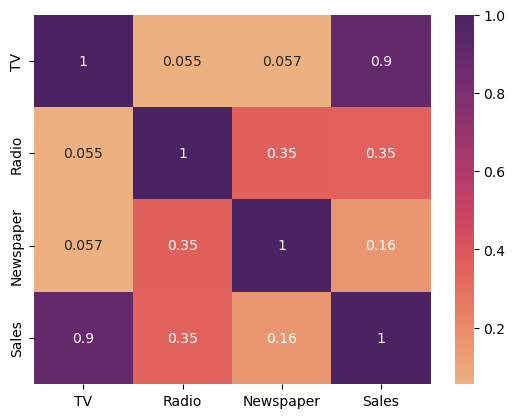

In [18]:
sns.heatmap(advertising.corr(), cmap="flare", annot = True)
plt.show()

## Time for Linear Regression

Follow the four steps in the article to perform linear regression.

In [22]:
# Step 1 is to assign your X and y
# Creating X and y
X = advertising['TV']
y = advertising['Sales']

In [23]:
# Step 2 is to create your train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [24]:
# Step 3 is to build the model. Remember to import any libraries you may need
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [25]:
# Step 4 is to perform residual analysis
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const    6.948683
TV       0.054546
dtype: float64

## Evaluate Your Model

Use your model to make some predictions on the test data.

In [26]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           1.52e-52
Time:                        17:27:13   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Summarize Your Results

Make note of your answers to each of the following questions by editing the cell.

1. Did you get the same coefficients and p-values as the author?
Yes, the coefficient and p value is the same.
2. Did you get the same R-squared values as the author?
Yes, the R-squared value is the same
3. Did you get the same F-statistic value and significance as the author?
Yes, the F-statistic value is the same